In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sklearn functions and models
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

## Importing and cleaning data

In [2]:
data = pd.read_csv('../data_processed/data_final_aggregates.csv')
data.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)
display(data)

#I fixed this bug in the notebook before
#data.drop(columns = ['gender', 'country', 'etnicity', 'Unnamed: 0', 'id_number'], axis = 1, inplace = True)

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,alcohol,...,white,other2,australia,canada,new_zealand,ireland,uk,usa,male,female
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,...,0,0,0,0,0,0,1,0,0,1
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,...,1,0,0,0,0,0,1,0,1,0
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,...,1,0,0,0,0,0,1,0,1,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,...,1,0,0,0,0,0,1,0,0,1
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,...,1,0,0,0,0,0,0,1,0,1
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,...,1,0,0,0,0,0,0,1,1,0
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,...,1,0,0,0,0,0,0,1,0,1
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,...,1,0,0,0,0,0,0,1,0,1


In [3]:
# rearrange column (drugs at the end)
cols = list(data.columns.values)
substances = ['alcohol','anphet', 'amyl', 'benzo', 'caffeine', 'cannabis', 
              'chocolate', 'cocaine', 'crack', 'ecstasy', 'heroine', 'ketamine', 
              'legal_h', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa']

for drug in substances:
    cols.remove(drug)
data = data[cols + substances]
data


,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,asian,...,ecstasy,heroine,ketamine,legal_h,lsd,meth,mushrooms,nicotine,semer,vsa
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,...,0,0,0,0,0,0,0,2,0,0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,...,4,0,2,0,2,3,0,4,0,0
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,...,0,0,2,0,0,0,0,2,0,0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,...,1,0,0,1,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0,...,0,0,0,3,3,0,0,0,0,5
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0,...,2,0,0,3,5,4,4,5,0,0
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0,...,4,0,2,0,2,0,2,6,0,0
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0,...,3,0,0,3,3,0,3,4,0,0


## Studying the correlation between the consume of substances


In [3]:
# studies correlation between drugs
data_drug = data[substances]
corr = data_drug.corr()
display(corr)
fig = sns.clustermap(corr, figsize=(10,10), cmap='vlag').fig
fig.savefig('../img/correlation_substances.png')
#fig

NameError: name 'substances' is not defined

## Data preparation and evaluation functions

In [4]:
# data preparation - divide in 3 categories
data_cut = data.copy() #This allows to run more than one time!

for drug in substances:
    data_cut[drug] = pd.cut(data[drug], bins = 2, labels = ['not_user','user'])
data_cut.to_csv('../data_processed/data_cut.csv')
data_cut['ecstasy'].value_counts()

NameError: name 'substances' is not defined

Text(0, 0.5, 'Mutual Information')

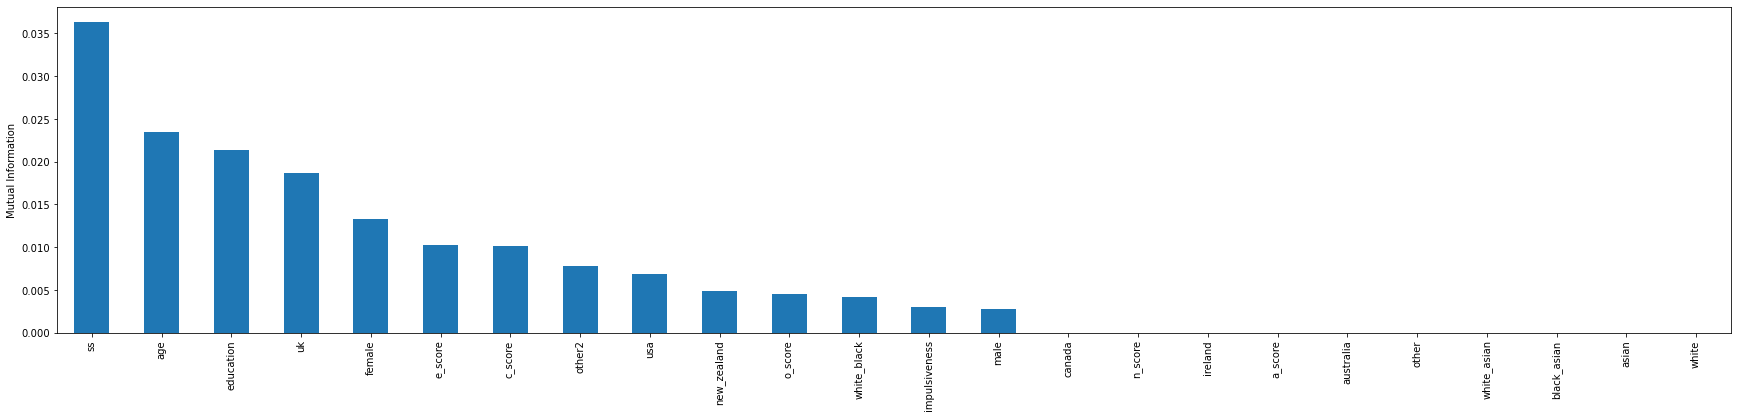

In [17]:
# where more information is stored (I think, does someone know it better?)
X_train, X_test, y_train, y_test = train_test_split(data_cut.drop(substances, axis = 1),
                                                    data_cut['ecstasy'], test_size=0.3, random_state=0)

mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(30, 6))
plt.ylabel('Mutual Information')

In [18]:
# calculate specificity (stole from stack overflow as a real data scientist haahah) 
# but probably i have to create my own :(

def specificity(y_true: np.array, y_pred: np.array, classes: set = None):

    if classes is None: # Determine classes from the values
        classes = set(np.concatenate((np.unique(y_true), np.unique(y_pred))))

    specs = []
    for cls in classes:
        y_true_cls = (y_true == cls).astype(int)
        y_pred_cls = (y_pred == cls).astype(int)

        fp = sum(y_pred_cls[y_true_cls != 1])
        tn = sum(y_pred_cls[y_true_cls == 0] == False)

        specificity_val = tn / (tn + fp)
        specs.append(specificity_val)

    return np.mean(specs)

## Logistic Regression

With out any k-fold:

Accuracy score: 0.666077738515901
Specificity score: 9


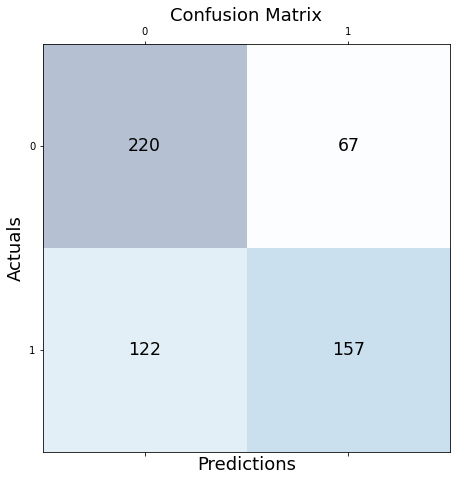

In [20]:
# Divide the data for cannabis
X_train, X_test, y_train, y_test = train_test_split(data_cut.drop(substances, axis = 1),
                                                    data_cut['nicotine'], test_size=0.3, random_state=0)

model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")
spec1=9
#spec1 = specificity(y_test, y_pred) #not sure if it works!
print(f"Specificity score: {spec1}")


#Confusion matrix, Accuracy, sensitivity and specificity

# great method but it is not working, unfortunately
cm1 = confusion_matrix(y_test, y_pred)
#print('Confusion Matrix : \n', cm1)
#total1=sum(sum(cm1))
#print(total1)
#accuracy1=np.trace(cm1)/total1
#print ('Accuracy : ', accuracy1)
#
#sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
#print('Sensitivity not user: ', sensitivity1 )
#
#specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
#print('Specificity : ', specificity1)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,s=cm1[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

With k-fold strategy:

In [21]:

cv = KFold(n_splits=6, random_state=1, shuffle=True) # more than 6 --> overfit
scores = cross_val_score(model, data_cut.drop(substances, axis = 1), data_cut['cannabis'], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.794 (0.022)


It doesn't improve a lot. It is an hard task getting a higher accuracy will be tough! But if you sum mean and sd you can reach an accuracy higer than 80: to explore!

## Support Vector Machine

In [24]:
from sklearn.svm import SVC

for i in ['linear', 'poly', 'rbf', 'sigmoid']: #try all different Kernel method
    print(f'SVM method: {i} \n')
    model = SVC(kernel = i, random_state = 0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc2 = accuracy_score(y_test, y_pred)
    print(f"Accuracy of kernel {i} is: {acc2}")
    #spec1 = specificity(y_test, y_pred)
    print(f"Specificity score: {spec1}") #not sure it is correct
    cm1 = confusion_matrix(y_test, y_pred) 
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,s=cm1[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
    cv = KFold(n_splits=5, random_state=1, shuffle=True) # more than 6 --> overfit
    scores = cross_val_score(model, data.drop(substancies, axis = 1), data['nicotine'], scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
    print('\n')

IndentationError: unexpected indent (Temp/ipykernel_19300/1188625120.py, line 23)

## K-Neighboors Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier

#it stopped word bohhh. It isn't working with categories, change to int

# facoultative: create a function to convert categories to number
#smart solution: re run the functio hahahha :)

data_cut_int = data.copy() 

for drug in substances:
    data_cut_int[drug] = pd.cut(data[drug], bins = 3, labels = [0,1,2])
X_train, X_test, y_train, y_test = train_test_split(data.drop(substances, axis = 1),
                                                    data['cannabis'], test_size=0.3, random_state=0)

data_cut_int.to_csv('./data_processed/data_cut_int.csv') 
    
    
model = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#print(y_train)
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc3}")
spec1 = specificity(y_test, y_pred)
print(f"Specificity score: {spec1}")
#no k-folding (is it necessary?) I have done it, it's crap

Accuracy score: 0.3763250883392226
Specificity score: 0.8903991337463241


In [27]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) # more than 6 --> overfit
scores = cross_val_score(model, data_cut_int.drop(substances, axis = 1), data_cut_int['cannabis'], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.667 (0.012)


## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc4}")

spec1 = specificity(y_test, y_pred)
print(f"Specificity score: {spec1}")

NameError: name 'classifier' is not defined

In [30]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) # more than 6 --> overfit
scores = cross_val_score(model, data_cut_int.drop(substances, axis = 1), data_cut_int['cocaine'], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.700 (0.028)


## E proviamo sto Xgboost!

In [32]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [33]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
X = data.drop(substances, axis = 1)[:1200]
y = data['cannabis'][:1200]

xgb_model.fit(X,y)
X_test = data.drop(substances, axis = 1)[1200:]

y_pred = xgb_model.predict(X_test)
y_test = data['cannabis'][1200:].tolist()

print(f'N train : {len(X)}; N test : {len(X_test)}')
a = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        a += 1 
acc_xg = a/len(y_pred)
print(f"Accuracy score: {acc_xg}")

spec1 = specificity(y_test, y_pred) # not sure it works
print(f"Specificity score: {spec1}")


kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []
#for train_index, test_index in kfold.split(X):   
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]
#
#    xgb_model = xgb.XGBRegressor(objective="reg:linear")
#    xgb_model.fit(X_train, y_train)
#    
#    y_pred = xgb_model.predict(X_test)
#    
#    scores.append(mean_squared_error(y_test, y_pred))
#    
#display_scores(np.sqrt(scores))

NameError: name 'xgb' is not defined